<a href="https://colab.research.google.com/github/vilokguliani/Misc_Tools/blob/main/YCBS255_Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2  <font color="blue"> (15 points) </font>

***

### General Instructions
  + You may need additional libraries besides the Python standard library to solve some questions. Import only necessary libraries.
  + If more than one library exist for a same purpose, choose the one you wish as long as it does the task properly.
  + If we want you to use a specific library, then we will state it clearly.
  + Use the exact variable names asked in the questions. When no clear instructions given, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells.
  + Use text cells for explanations. Use explanation and plain text as much as possible.
  + Do not remove or modify the original cells provided by the instructor.
  + In the following cell you will find some extra options to make your code more readable, including output colors RED, OKBLUE, or output text styles like BOLD or UNDERLINE that. Do not hesitate to use them. As an example, one may output text in red as follows:
  ```python
     print(bcolors.RED + "your text" + bcolors.ENDC)
  ```
  + Comment your code whenever needed using # sign at the beginning of the row.
  + In some questions some of the details needed for solving the problem are **purposely** omitted to encourage additional self-directed research. This, especially, helps you develop some search skills for coding in Python (which is inevitable due to the inconsistent syntax of Python).
  + Do not hesitate to communicate your questions to the TA's or instructors.
    
  Good luck!

In [13]:

# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

## **Part A** <font color="blue">(7 points)</font>

1. **<font color=blue> (1 point) </font>** Download `Credit.csv` from <http://www.statlearning.com/resources-first-edition> and upload it into this notebook. Print the first $5$ rows of the data. Using appropriate descriptive statistics or visualization methods describe the variables and possible association amongst them. Interpret the results.
2. **<font color=blue> (0.5 points)</font>** Keep only `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education`, and `Balance` as your variables and throw the rest of variables away. Print the dimension of this new dataset.
3.  **<font color=blue> (0.5 points) </font>** Create a binary variable `Balance_1500` which equals $1$ for the observations with `Balance` $> 1500$, and equals $0$ otherwise.
4. **<font color=blue> (3 points) </font>** Model `Balance_1500` by the explanatory variables `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education` using the following models:
    + logistic regression,
    + linear discriminant, and
    + quadratic discriminant.
8. **<font color=blue> (0.5 points) </font>** Find the probability of (`Balance` $> 1500$), for the following values, using all three aforementionned methods:

|    Income    |    Limit     |     Rating     |    Cards     |      Age        |   Education   |
|--------------|--------------|----------------|--------------|-----------------|---------------|
|      63      |    8100      |     600        |      4       |       30        |      13       |
|     186      |    13414     |     950        |      2       |       41        |      13       |

</br>
Compare the probabilities and comment.
    
9. **<font color=blue> (1.5 points) </font>** For each method, print the confusion matrix, the accuracy score and the AUC using all observations. Compare these metrics and comment.

First 5 rows of the dataset:
    Income  Limit  Rating  Cards  Age  Education  Own Student Married Region  \
0   14.891   3606     283      2   34         11   No      No     Yes  South   
1  106.025   6645     483      3   82         15  Yes     Yes     Yes   West   
2  104.593   7075     514      4   71         11   No      No      No   West   
3  148.924   9504     681      3   36         11  Yes      No      No   West   
4   55.882   4897     357      2   68         16   No      No     Yes  South   

   Balance  
0      333  
1      903  
2      580  
3      964  
4      331  

Descriptive Statistics:
           Income         Limit      Rating       Cards         Age  \
count  400.000000    400.000000  400.000000  400.000000  400.000000   
mean    45.218885   4735.600000  354.940000    2.957500   55.667500   
std     35.244273   2308.198848  154.724143    1.371275   17.249807   
min     10.354000    855.000000   93.000000    1.000000   23.000000   
25%     21.007250   3088.000000 

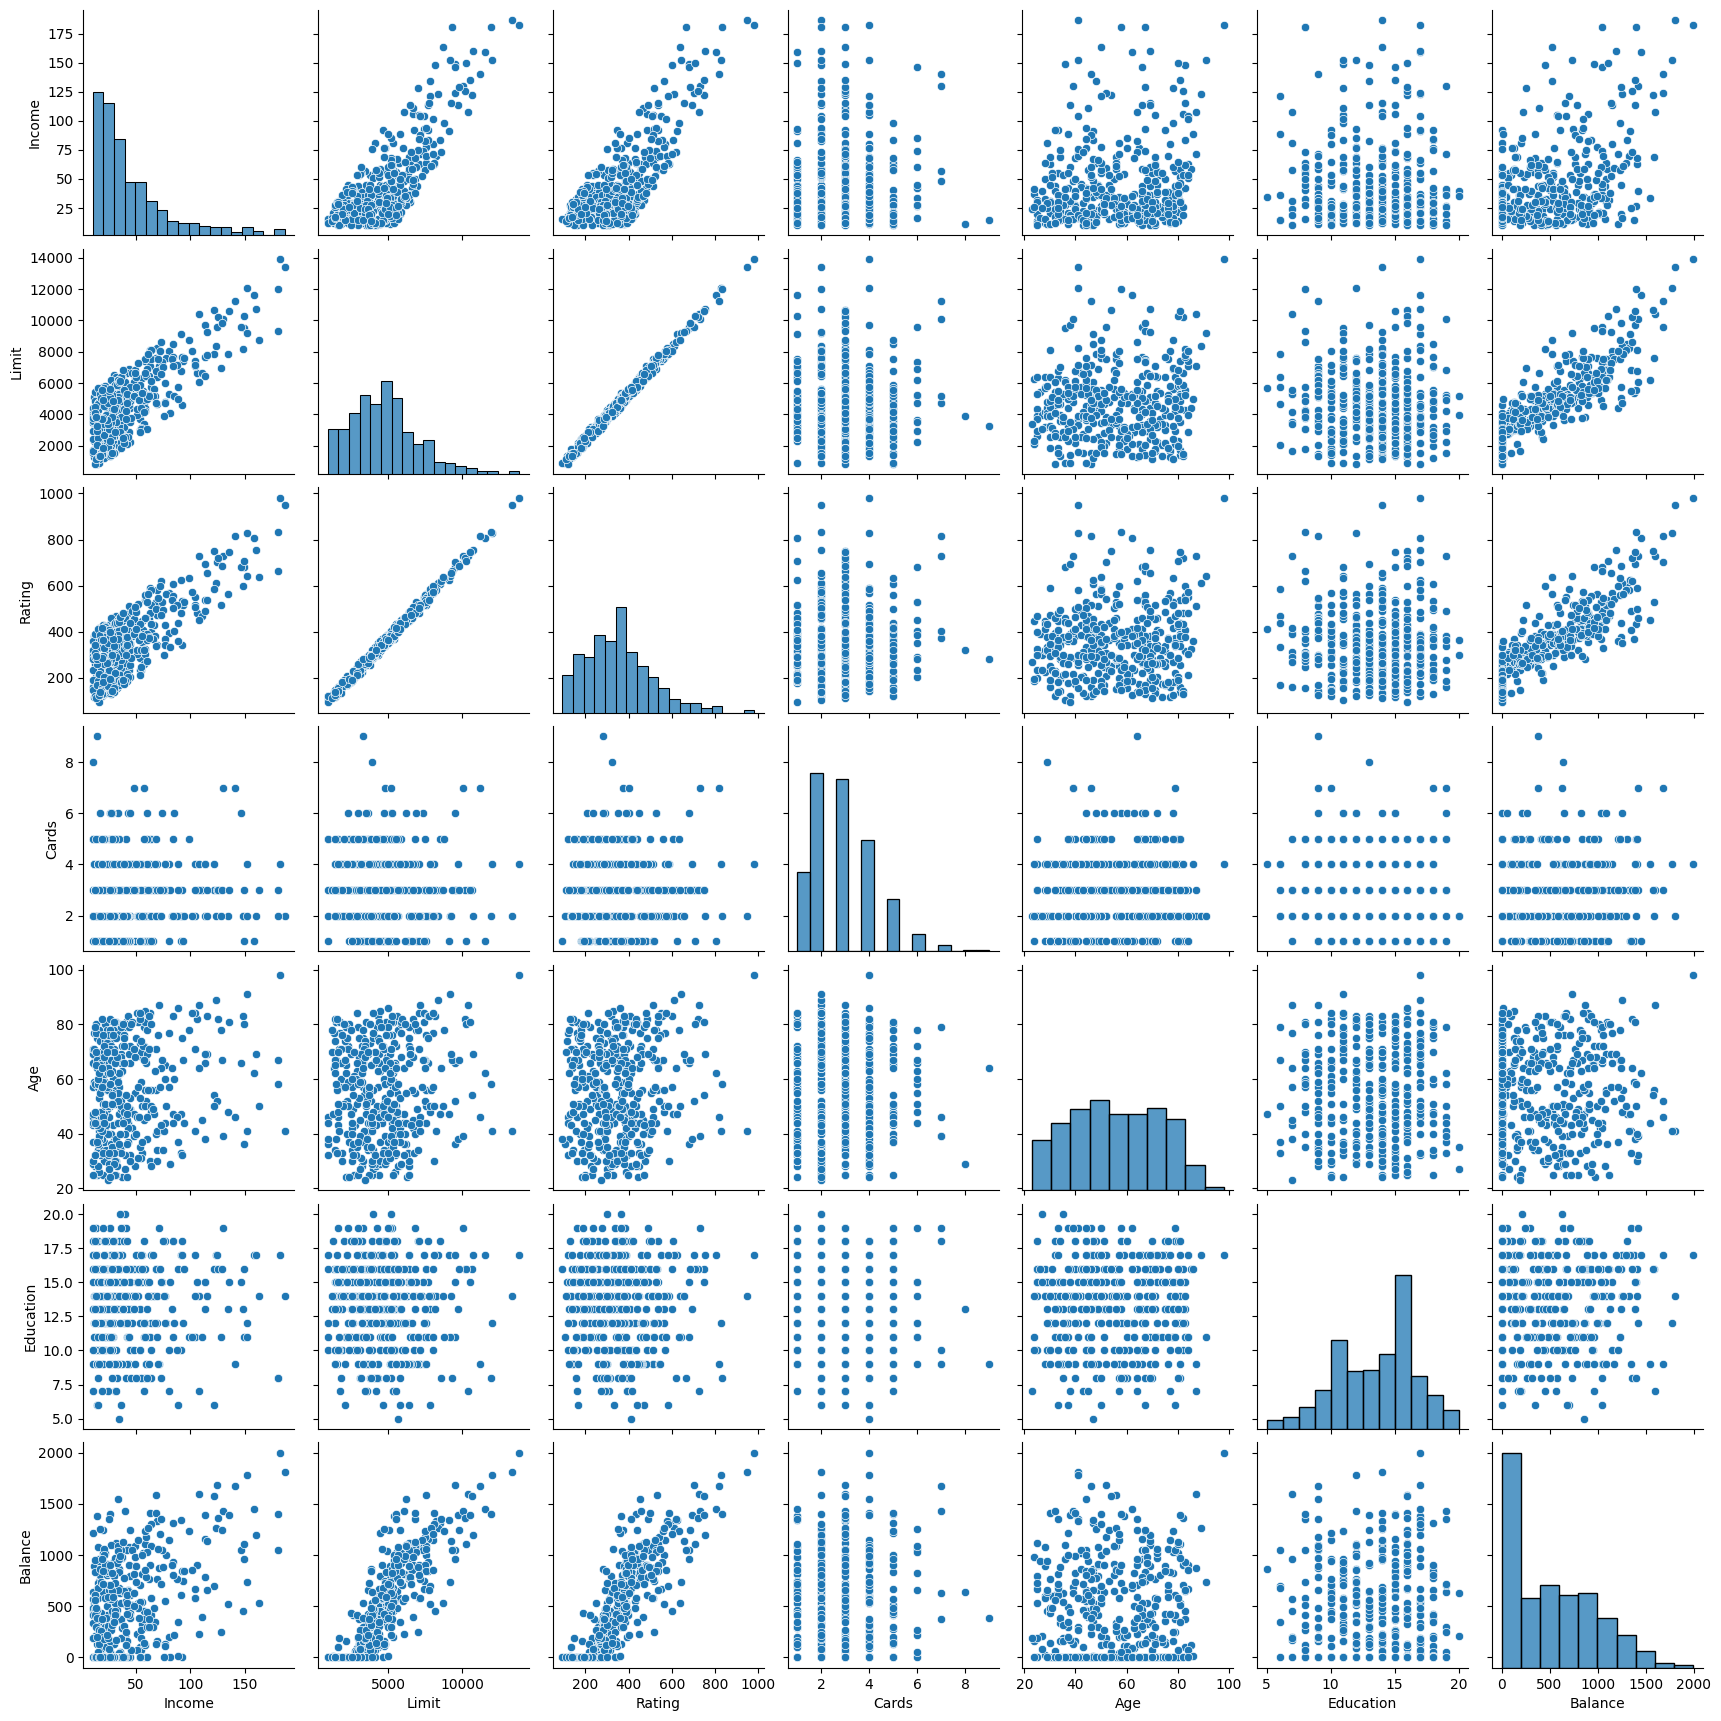


Dimensions of the new dataset:
(400, 7)

First 5 rows of the new dataset:
    Income  Limit  Rating  Cards  Age  Education  Balance
0   14.891   3606     283      2   34         11      333
1  106.025   6645     483      3   82         15      903
2  104.593   7075     514      4   71         11      580
3  148.924   9504     681      3   36         11      964
4   55.882   4897     357      2   68         16      331
    Income  Limit  Rating  Cards  Age  Education  Balance  Balance_1500
0   14.891   3606     283      2   34         11      333             0
1  106.025   6645     483      3   82         15      903             0
2  104.593   7075     514      4   71         11      580             0
3  148.924   9504     681      3   36         11      964             0
4   55.882   4897     357      2   68         16      331             0


<ipython-input-14-429f7296aa84>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Balance_1500'] = filtered_data['Balance'].apply(lambda x: 1 if x > 1500 else 0)


LogisticRegression()

LinearDiscriminantAnalysis()

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# 1 Load the dataset
url = 'https://www.statlearning.com/s/Credit.csv'
credit_data = pd.read_csv(url)

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(credit_data.head())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(credit_data.describe())

# Visualization of the data
sns.pairplot(credit_data)
plt.show()

# 2 Filter the dataset to keep only specified columns
filtered_data = credit_data[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance']]

# Print the dimensions of the new dataset
print("\nDimensions of the new dataset:")
print(filtered_data.shape)

# Display the first 5 rows of the new dataset
print("\nFirst 5 rows of the new dataset:")
print(filtered_data.head())

#3 Create a binary variable Balance_1500
filtered_data['Balance_1500'] = filtered_data['Balance'].apply(lambda x: 1 if x > 1500 else 0)

# Display the first 5 rows of the new dataset with Balance_1500
print(filtered_data.head())

#4 Define features and target
X = filtered_data[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
y = filtered_data['Balance_1500']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Fit logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Fit linear discriminant analysis model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Fit quadratic discriminant analysis model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

In [15]:
#5 Define the new observations
new_observations = pd.DataFrame({
    'Income': [63, 186],
    'Limit': [8100, 13414],
    'Rating': [600, 950],
    'Cards': [4, 2],
    'Age': [30, 41],
    'Education': [13, 13]
})

# Predict probabilities using all three models
log_reg_probs = log_reg.predict_proba(new_observations)[:, 1]
lda_probs = lda.predict_proba(new_observations)[:, 1]
qda_probs = qda.predict_proba(new_observations)[:, 1]

# Display the probabilities
probabilities = pd.DataFrame({
    'Logistic Regression': log_reg_probs,
    'LDA': lda_probs,
    'QDA': qda_probs
}, index=['Observation 1', 'Observation 2'])

print(probabilities)

print(bcolors.RED + "Clearly, LDA is best suited for Obs 2 but Logistic Regression is best suited for Obs 1" + bcolors.ENDC)

               Logistic Regression       LDA  QDA
Observation 1             0.057638  0.020820  0.0
Observation 2             0.777961  0.994514  0.0
Clearly, LDA is best suited for Obs 2 but Logistic Regression is best suited for Obs 1


In [16]:
# 9 Predict the class labels for the test set
log_reg_preds = log_reg.predict(X_test)
lda_preds = lda.predict(X_test)
qda_preds = qda.predict(X_test)

# Calculate confusion matrix, accuracy score, and AUC for logistic regression
log_reg_cm = confusion_matrix(y_test, log_reg_preds)
log_reg_acc = accuracy_score(y_test, log_reg_preds)
log_reg_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

# Calculate confusion matrix, accuracy score, and AUC for LDA
lda_cm = confusion_matrix(y_test, lda_preds)
lda_acc = accuracy_score(y_test, lda_preds)
lda_auc = roc_auc_score(y_test, lda.predict_proba(X_test)[:, 1])

# Calculate confusion matrix, accuracy score, and AUC for QDA
qda_cm = confusion_matrix(y_test, qda_preds)
qda_acc = accuracy_score(y_test, qda_preds)
qda_auc = roc_auc_score(y_test, qda.predict_proba(X_test)[:, 1])

# Print the results
print("\nLogistic Regression")
print("Confusion Matrix:\n", log_reg_cm)
print("Accuracy:", log_reg_acc)
print("AUC:", log_reg_auc)

print("\nLinear Discriminant Analysis")
print("Confusion Matrix:\n", lda_cm)
print("Accuracy:", lda_acc)
print("AUC:", lda_auc)

print("\nQuadratic Discriminant Analysis")
print("Confusion Matrix:\n", qda_cm)
print("Accuracy:", qda_acc)
print("AUC:", qda_auc)



Logistic Regression
Confusion Matrix:
 [[77  0]
 [ 3  0]]
Accuracy: 0.9625
AUC: 0.935064935064935

Linear Discriminant Analysis
Confusion Matrix:
 [[77  0]
 [ 2  1]]
Accuracy: 0.975
AUC: 0.8744588744588744

Quadratic Discriminant Analysis
Confusion Matrix:
 [[77  0]
 [ 3  0]]
Accuracy: 0.9625
AUC: 0.5


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curves')

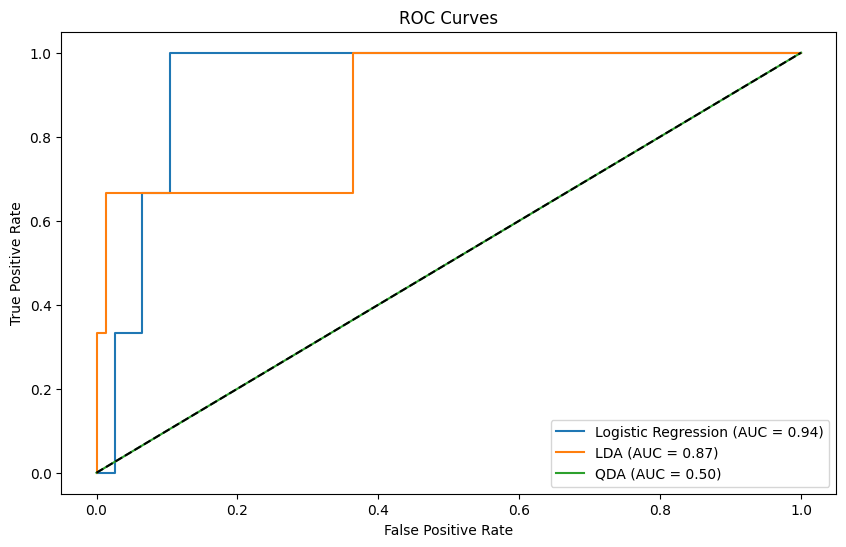

               Logistic Regression       LDA  QDA
Observation 1             0.057638  0.020820  0.0
Observation 2             0.777961  0.994514  0.0


In [17]:
# 9 Plot ROC curves for comparison
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
fpr_lda, tpr_lda, _ = roc_curve(y_test, lda.predict_proba(X_test)[:, 1])
fpr_qda, tpr_qda, _ = roc_curve(y_test, qda.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression (AUC = {:.2f})'.format(log_reg_auc))
plt.plot(fpr_lda, tpr_lda, label='LDA (AUC = {:.2f})'.format(lda_auc))
plt.plot(fpr_qda, tpr_qda, label='QDA (AUC = {:.2f})'.format(qda_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# Compare the probabilities and metrics
print(probabilities)

## **Part B** <font color="blue">(8 points)</font>

Donwload  `ziptrain.csv` and `ziptest.csv` datasets from  **Athena/Content/Data**. Save them and upload them here as **two separate datasets** and name them `ziptrain` and `ziptest`, respectively. Explore the data in order to understand it.

  1. **<font color="blue">(1 point)</font>** From `ziptrain` dataset select only the rows corresponding to digits $2$ and $7$ and save them in a new dataset called `binar_train`. Do the same thing in `ziptest` and call it `binar_test`.
  2. **<font color="blue">(1 point)</font>** Project `binar_train` onto the first **two principal components** and make a scatterplot of the data in the new space (two-dimensional space spanned by the frist two PCs). Use a different color (or marker) for each digit. Based on the plot do you think that these two digits can be separated well using only two PCs? Explain.
  3. **<font color="blue">(1 point)</font>** Fit a **logistic regression**, in the new space, to separate digits $2$ and $7$.
  4. **<font color="blue">(1 point)</font>** Evaluate the trainded model on `binar_test` using **accuracy**, and an **appropriate F-measure**.
  5. **<font color="blue">(0.5 points)</font>** Build and print a confusion matrix for your predictions.

For the rest of the questions use the **whole training data**, i.e., `ziptrain` (**not** `binar_train`).

  6. **<font color="blue">(1 point)</font>** Project the whole data onto the first $m=2, 3, 4, 5$ principal components (one $m$ at a time).
  7. **<font color="blue">(1.5 points)</font>** For each $m$, and using **$5$-fold cross-validation**, train a **linear discriminant** classifier on `ziptrain`.
  8. **<font color="blue">(1 point)</font>** Based on **cross-validated accuracy**, select the best number of principal components $m$.


In [20]:
#0 Load and Explore the Datasets
# Using our Colab traditional method (Part 1)
from google.colab import files
uploaded = files.upload()
ziptest = pd.read_csv('ziptest.csv', header=None, sep=' ').dropna(axis='columns')
ziptrain = pd.read_csv('ziptrain.csv', header=None, sep=' ').dropna(axis='columns')

# Explore the data to understand its structure
print("ziptrain head:\n", ziptrain.head()) #\n puts it on a new line below
print("ziptest head:\n", ziptest.head())
print("\n ziptrain shape:", ziptrain.shape)
print("ziptest shape:", ziptest.shape)

print("\n ziptrain info: ", ziptrain.info())
print("\n ziptrain describe:\n", ziptrain.describe())

Saving ziptest.csv to ziptest (1).csv
Saving ziptrain.csv to ziptrain (1).csv
ziptrain head:
    0    1    2    3      4      5      6      7      8      9    ...    247  \
0  6.0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -0.631  0.862  ...  0.304   
1  5.0 -1.0 -1.0 -1.0 -0.813 -0.671 -0.809 -0.887 -0.671 -0.853  ... -0.671   
2  4.0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000  ... -1.000   
3  7.0 -1.0 -1.0 -1.0 -1.000 -1.000 -0.273  0.684  0.960  0.450  ... -0.318   
4  3.0 -1.0 -1.0 -1.0 -1.000 -1.000 -0.928 -0.204  0.751  0.466  ...  0.466   

     248    249    250    251    252    253    254    255  256  
0  0.823  1.000  0.482 -0.474 -0.991 -1.000 -1.000 -1.000 -1.0  
1 -0.671 -0.033  0.761  0.762  0.126 -0.095 -0.671 -0.828 -1.0  
2 -1.000 -1.000 -0.109  1.000 -0.179 -1.000 -1.000 -1.000 -1.0  
3  1.000  0.536 -0.987 -1.000 -1.000 -1.000 -1.000 -1.000 -1.0  
4  0.639  1.000  1.000  0.791  0.439 -0.199 -0.883 -1.000 -1.0  

[5 rows x 257 columns]
ziptest head:
   

In [21]:
#1 Select only the rows corresponding to digits 2 and 7, according to the 1st (0) column
binar_train = ziptrain[(ziptrain.iloc[:, 0] == 2) | (ziptrain.iloc[:, 0] == 7)].dropna()
binar_test = ziptest[(ziptest.iloc[:, 0] == 2) | (ziptest.iloc[:, 0] == 7)].dropna()

print("binar_train shape:", binar_train.shape)
print("binar_test shape:", binar_test.shape)

binar_train.head()

binar_train shape: (1376, 257)
binar_test shape: (345, 257)


,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
10,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.596,0.912,1.000,0.290,...,-1.000,-0.795,0.663,-0.074,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
14,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-0.632,...,-1.000,-0.967,0.866,-0.001,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
15,7.0,-1.0,-1.0,-1.0,-0.929,0.351,0.798,0.806,0.114,0.015,...,0.835,-0.086,-0.991,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
22,7.0,-1.0,-1.0,-1.0,-1.000,-0.869,0.777,-0.007,-0.697,-1.000,...,-0.933,0.667,-0.315,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Principal Component 1')

Text(0, 0.5, 'Principal Component 2')

Text(0.5, 1.0, 'PCA of Digits 2 and 7')

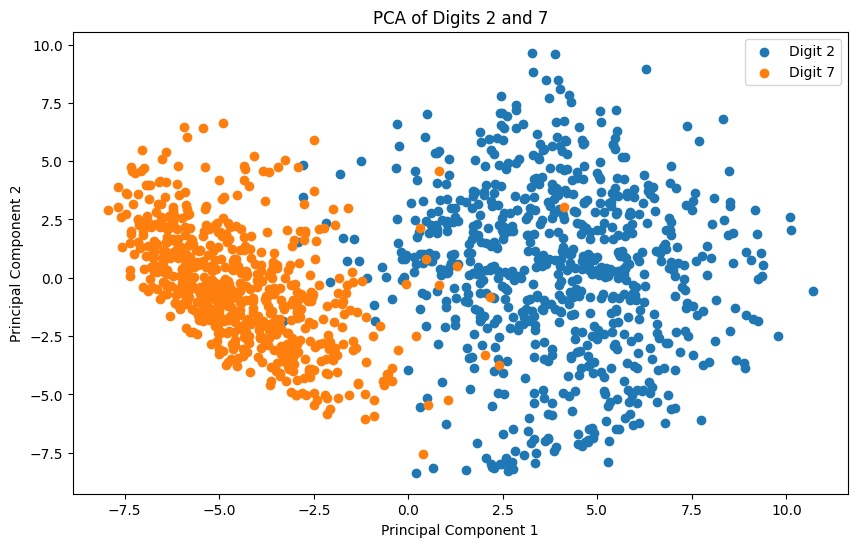

In [22]:
#2 Project binar_train onto the First Two Principal Components
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Separate features and labels.
#Given data was unlabelled, we assume the first column has our digit labels.
X_train = binar_train.iloc[:, 1:]
y_train = binar_train.iloc[:, 0]

# Perform PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Scatter plot of the data in the new space
plt.figure(figsize=(10, 6))
for digit in [2, 7]:
    subset = X_train_pca[y_train == digit]
    plt.scatter(subset[:, 0], subset[:, 1], label=f'Digit {digit}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Digits 2 and 7')
plt.legend()
plt.show()

Observations:

Cluster Formation: From the plot, we observe that the points for digits 2 and 7 tend to form distinct clusters.
Overlap: There is some overlap between the clusters, especially in the central region of the plot.
Separation: Despite the overlap, there are clear areas where one digit's points dominate (e.g., upper right corner for digit 2 and lower left corner for digit 7).
Conclusion:

Separability: While there is overlap, the clusters of digits 2 and 7 exhibit enough separation along PC1 and PC2 to suggest that these two digits can be reasonably separated using these two principal components.
Dimensionality Reduction: PCA effectively captures the variance in the data and projects it onto lower-dimensional space. The plot indicates that PCA has preserved enough discriminative information between the two digits in the reduced space.
Considerations:

Higher Dimensions: While PC1 and PC2 show promising separation, using additional principal components (PC3, PC4, etc.) might further improve separation or reduce overlap between the clusters.
Model Selection: The effectiveness of using only two PCs for classification depends on the specific machine learning model employed (e.g., logistic regression, linear discriminant analysis). Some models may require more dimensions to achieve optimal performance.
Conclusion
Based on the scatter plot of the first two principal components:

Yes, digits 2 and 7 can be separated reasonably well using only these two principal components.
PCA effectively reduces the dimensionality while preserving the essential characteristics that differentiate between the two digits, as observed in the distinct clustering patterns on the plot.
This analysis validates the utility of PCA for dimensionality reduction in the context of distinguishing between handwritten digits, providing a foundational insight into the separability of different classes in reduced feature space.

In [23]:
#3 Fit a Logistic Regression Model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_pca, y_train)

LogisticRegression()

In [24]:
#4 Evaluate the Model on binar_test
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Separate features and labels in the test set
X_test = binar_test.iloc[:, 1:]
y_test = binar_test.iloc[:, 0]

# Project binar_test onto the first two principal components
X_test_pca = pca.transform(X_test)

# Predict using the logistic regression model
y_pred = log_reg.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label=2)
#Using F1 because data is balanced

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.9652173913043478
F1 Score: 0.9698492462311558


In [25]:
# 5 Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[193   5]
 [  7 140]]


In [26]:
#6 Project the whole ziptrain dataset onto the first m principal components

for m in [2, 3, 4, 5]:
    pca = PCA(n_components=m)
    X_train_pca = pca.fit_transform(ziptrain.iloc[:, 1:])

    print(f"Projection onto {m} principal components done.")

Projection onto 2 principal components done.
Projection onto 3 principal components done.
Projection onto 4 principal components done.
Projection onto 5 principal components done.


In [27]:
#7 Train a Linear Discriminant Classifier Using 5-fold Cross-Validation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

# Train a linear discriminant classifier using 5-fold cross-validation

best_m = None
best_score = 0

for m in [2, 3, 4, 5]:
    pca = PCA(n_components=m)
    X_train_pca = pca.fit_transform(ziptrain.iloc[:, 1:])

    lda = LinearDiscriminantAnalysis()
    scores = cross_val_score(lda, X_train_pca, ziptrain.iloc[:, 0], cv=5)

    mean_score = scores.mean()
    print(f"Cross-validated accuracy with {m} PCs: {mean_score:.3f}")

    # Update the best number of PCs if the current mean score is higher
    if mean_score > best_score:
        best_score = mean_score
        best_m = m

Cross-validated accuracy with 2 PCs: 0.544
Cross-validated accuracy with 3 PCs: 0.584
Cross-validated accuracy with 4 PCs: 0.694
Cross-validated accuracy with 5 PCs: 0.720


In [28]:
#8 Based on cross-validated accuracy, select the best number of principal components  𝑚
print(bcolors.BOLD + f"Based on only cross-validated accuracy, the best number of PCs is {best_m} with {100*best_score:3f}% cross-validated accuracy." + bcolors.ENDC)
print(f"\nHowever, it should be noted that accuracy alone is not the only consideration when choosing the best number of principal components. \nOther factors, such as explained variance, overfitting risk, computational efficiency, model simplicity/interpretability, domain knowledge, and model stability/robustness should also be considered")

Based on only cross-validated accuracy, the best number of PCs is 5 with 72.006410% cross-validated accuracy.

However, it should be noted that accuracy alone is not the only consideration when choosing the best number of principal components. 
Other factors, such as explained variance, overfitting risk, computational efficiency, model simplicity/interpretability, domain knowledge, and model stability/robustness should also be considered


In [29]:
print("Variance: Check cumulative variance explained by selected PCs.\n Overfitting: Fewer PCs reduce overfitting risk; too many may capture noise. \n Efficiency: Fewer PCs mean faster computation and less resource use. \n Simplicity: Simpler models with fewer PCs are easier to interpret and deploy. \n Domain: Use domain knowledge to select relevant features. \n Stability: Ensure consistent model performance across datasets or folds.")

Variance: Check cumulative variance explained by selected PCs.
 Overfitting: Fewer PCs reduce overfitting risk; too many may capture noise. 
 Efficiency: Fewer PCs mean faster computation and less resource use. 
 Simplicity: Simpler models with fewer PCs are easier to interpret and deploy. 
 Domain: Use domain knowledge to select relevant features. 
 Stability: Ensure consistent model performance across datasets or folds.
